<a href="https://colab.research.google.com/github/lcbjrrr/fiap-bdt-ml/blob/master/Atividade_terca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
$import pandas as pd

bras = pd.read_excel("/content/tabela_brasileirao_results2.xlsx")
bras.head(10)  

,Pos.,Gols Pro,Gols Sofridos,Saldo,Qtd_Jogadores,Idade_Media,Estrangeiros,Valor_total,Media_Valor
0,18,30,47,-17,51,24.8,0,27350000,536000
1,7,54,37,17,52,24.0,3,37650000,724000
2,6,56,43,13,50,23.4,6,61350000,1230000
3,11,39,41,-2,48,23.2,2,34900000,727000
4,9,38,46,-8,45,23.1,4,25550000,568000
5,15,32,38,-6,54,26.0,2,26950000,499000
6,14,34,50,-16,52,24.8,5,32030000,616000
7,13,34,35,-1,54,24.3,6,61400000,1140000
8,8,34,34,0,51,24.0,5,62250000,1220000
9,2,59,29,30,48,23.8,7,67380000,1400000


##KMEANS
#Iniciamos a analise observando quais as métricas que tínhamos em nossa base, e quais seriam de importante valor.

#Treinamos a base usando 2 clusters, essa escolha foi para diferenciar a 1ª e 2ª parte da tabela do campeonato

In [0]:
from sklearn.cluster import KMeans
k = KMeans(n_clusters=2)


k.fit(bras)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#Queríamos saber se, na pratica, há uma relação com relação ao Valor Médio do Time em sua Posição no Campeonato. Para visualizarmos, usamos o seaborn, plotando as informações de Media_Valor, que corresponde à média do valor do time naquela temporada, e a Posição no campeonato. Identificamos que os times que tem os mais altos valores sempre estão nas 16ª posições para cima. Salvo alguns casos, que podem explicar clubes que gastaram muito na temporada, elevaram seu Valor Médio, mas não conseguiram bons resultados no campeonato.

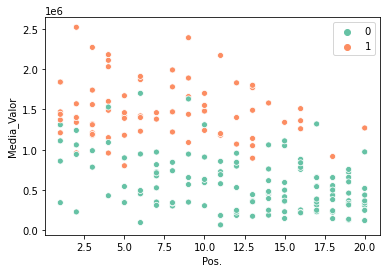

In [0]:
import seaborn as sns 
sns.scatterplot(bras['Pos.'], bras['Media_Valor'], hue=k.labels_, palette=sns.color_palette('Set2',2))

In [0]:
!pwd

/content


In [0]:
 !whoami

root


In [0]:
! ls

drive  sample_data


In [0]:
!pip install graphviz

In [0]:
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [0]:
bras

,Pos.,Gols Pro,Gols Sofridos,Saldo,Qtd_Jogadores,Idade_Media,Estrangeiros,Valor_total,Media_Valor
0,18,30,47,-17,51,24.8,0,27350000,536000
1,7,54,37,17,52,24.0,3,37650000,724000
2,6,56,43,13,50,23.4,6,61350000,1230000
3,11,39,41,-2,48,23.2,2,34900000,727000
4,9,38,46,-8,45,23.1,4,25550000,568000
...,...,...,...,...,...,...,...,...,...
195,18,46,61,-15,43,25.1,3,6230000,145000
196,12,58,58,0,33,23.9,1,27850000,844000
197,3,57,42,15,30,23.9,1,46650000,1560000
198,20,48,71,-23,30,25.0,1,15600000,520000


##Regressão Linear
#A outra analise que temos através do nosso Dataset foi a Regressão Linear, onde pretendíamos prever qual a Posição na tabela do Time com base em seu histórico de Saldo, que é a qtd de gols que o time sofreu, menos a qtd de gols pro, ou seja, gols a favor.

In [0]:
import pandas as pd

bras = pd.read_excel("/content/tabela_brasileirao_results2.xlsx")
bras.head(10)  

,Pos.,Gols Pro,Gols Sofridos,Saldo,Qtd_Jogadores,Idade_Media,Estrangeiros,Valor_total,Media_Valor
0,18,30,47,-17,51,24.8,0,27350000,536000
1,7,54,37,17,52,24.0,3,37650000,724000
2,6,56,43,13,50,23.4,6,61350000,1230000
3,11,39,41,-2,48,23.2,2,34900000,727000
4,9,38,46,-8,45,23.1,4,25550000,568000
5,15,32,38,-6,54,26.0,2,26950000,499000
6,14,34,50,-16,52,24.8,5,32030000,616000
7,13,34,35,-1,54,24.3,6,61400000,1140000
8,8,34,34,0,51,24.0,5,62250000,1220000
9,2,59,29,30,48,23.8,7,67380000,1400000


In [0]:
from sklearn.linear_model import LinearRegression
regfut = LinearRegression()
regfut.fit(bras[['Saldo','Qtd_Jogadores']] , bras['Pos.'] ) 
print(regfut.coef_,regfut.intercept_)

[-0.33264163 -0.00941172] 10.90686881543235


##Usamos a biblioteca do sklearn, onde definimos nossas variáveis Saldo e Qtd_Jogadores, para criar uma previsão de qual será a posição do Time na próxima temporada.
#Testamos com outras variáveis, mas com Saldo e Qtd_Jogadores tivemos melhores resultados, conforme demonstramos abaixo.

In [0]:
def prever_pos (Saldo, Qtd_Jogadores):
  PrevisaoPos = Saldo* -0.3326 * Qtd_Jogadores * -0.0094 - 10.9068
  return PrevisaoPos



In [0]:
  print(prever_pos(41,50))
  print(prever_pos(0,33))
  print(prever_pos(-6,24))


-4.497598000000001
-10.9068
-11.35700736


##O Time que tiver um saldo de 41 gols e 50 Jogadores disponíveis na próxima temporada poderá ficar em 4º Lugar.
#Já o Time que tiver -6 de Saldo de Gols e apenas 24 jogadores no elenco ficará em 11º no Campeonato.

In [0]:
import seaborn as sns

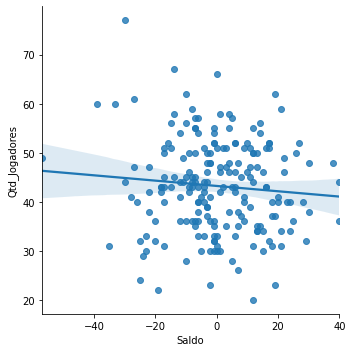

In [0]:
sns.lmplot("Saldo", "Qtd_Jogadores", data = bras)